In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import numpy as np



/Users/pinglab/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/pinglab/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


{'1': {'nrmse': 0.038582867022575164,
  'sse': 91.95056703912701,
  'nf': 2383.1968470701245,
  'sse_individual': [0.7742785514399978,
   11.899771090985029,
   30.712543081470958,
   0.6429754120469988,
   4.230752881793986,
   8.132606790617018,
   6.556483683031008,
   4.504512765623003,
   8.655134848880003,
   7.132088775253986,
   5.039038753920008,
   3.6703804040649954],
  'nf_individual': [117.06719914344006,
   301.6118583029851,
   285.60593168447036,
   53.4763645700471,
   128.75396705379404,
   143.96760905061672,
   252.55432551903078,
   246.55952157362313,
   201.5678354088797,
   258.7085258572537,
   172.09293747391976,
   221.23077143206422],
  'nrmses': [0.0066139666542401,
   0.039453923191014185,
   0.10753468214169074,
   0.01202354380699878,
   0.03285920409758215,
   0.05648914255259822,
   0.02596068655548311,
   0.01826947398694537,
   0.04293906729376287,
   0.027568046903831932,
   0.02928091546280719,
   0.01659073184216645],
  'count': 57283},
 '2': {'nr

In [3]:
with open('imp_nrmse.json') as f:
    dat = json.load(f)
df = pd.DataFrame.from_dict(dat, orient='index')
df['method']  = 'DMI'

with open('knn_nrmse.json') as f:
    dat = json.load(f)
df2 = pd.DataFrame.from_dict(dat, orient='index')
df2['method']  = 'KNN'

with open('si_nrmse.json') as f:
    dat = json.load(f)

df3 = pd.DataFrame.from_dict(dat, orient='index')
df3['method']  = 'SI'


In [4]:
all_df = pd.concat([df, df2, df3])
all_df['mask'] = all_df.index
all_df


,nrmse,sse,nf,sse_individual,nf_individual,nrmses,count,method,mask
1,0.038583,91.950567,2383.196847,"[0.7742785514399978, 11.899771090985029, 30.71...","[117.06719914344006, 301.6118583029851, 285.60...","[0.0066139666542401, 0.039453923191014185, 0.1...",57283,DMI,1
2,0.076978,183.452532,2383.196692,"[7.247058527440005, 9.876059325984999, 20.2651...","[117.06719914344006, 301.6118583029851, 285.60...","[0.06190511586905168, 0.03274426735590738, 0.0...",57280,DMI,2
3,0.123685,293.009517,2368.991899,"[12.335549495439952, 26.909213236485, 24.86976...","[117.06719914344006, 287.40838174048525, 285.6...","[0.10537152665902132, 0.09362709978577666, 0.0...",57273,DMI,3
4,0.248849,593.055753,2383.196622,"[22.225383376439968, 55.0450686199851, 87.1834...","[117.06719914344006, 301.6118583029852, 285.60...","[0.18985150015597158, 0.18250299882005766, 0.3...",57280,DMI,4
5,0.471116,1122.743866,2383.156451,"[62.6004356550069, 149.7624539369411, 98.93352...","[117.05918732000706, 301.60243870794113, 285.6...","[0.5347759290680434, 0.49655584543188874, 0.34...",57254,DMI,5
1,0.138833,327.571385,2359.470745,"[17.991853533546994, 47.10364944994405, 46.113...","[117.04209461954707, 284.6429464559443, 285.58...","[0.15372121963495852, 0.1654832836591457, 0.16...",56953,KNN,1
2,0.415859,989.744216,2379.998253,"[94.00343650730207, 68.64141053741095, 80.4201...","[117.04386083530208, 301.455569803411, 285.351...","[0.8031470923500953, 0.22769992467604513, 0.28...",56637,KNN,2
3,0.987953,2321.039831,2349.341912,"[55.766104593283984, 360.5991243737529, 148.05...","[116.80920012128408, 301.52151430175206, 285.4...","[0.47741192076806893, 1.195931657509779, 0.518...",55892,KNN,3
4,2.211645,5150.708422,2328.903936,"[268.02547113942734, 749.9863002262082, 195.64...","[116.68449289542805, 300.55108019220694, 285.2...","[2.297010206657282, 2.495370503232198, 0.68595...",53838,KNN,4
5,5.118802,11748.086306,2295.085197,"[185.99264803117245, 2585.683143199058, 668.54...","[115.89760306517309, 299.94849624905453, 241.7...","[1.604801506779934, 8.620423757857758, 2.76546...",53602,KNN,5


/var/folders/0h/n62580q96l75ngqv2hjdqqk80000gr/T/ipykernel_96205/618339501.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot_data.append({'nrmses': val, 'mask': all_df['mask'][idx], 'method': all_df['method'][idx]})
/var/folders/0h/n62580q96l75ngqv2hjdqqk80000gr/T/ipykernel_96205/618339501.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_plot, x='mask', y='nrmses', hue='method', ci='sd')


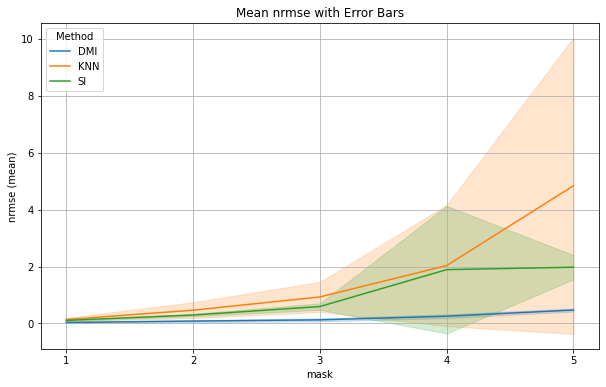

In [6]:
# Create a new DataFrame for Seaborn plotting
plot_data = []
for idx, row in enumerate(all_df['nrmses']):
    for val in row:
        plot_data.append({'nrmses': val, 'mask': all_df['mask'][idx], 'method': all_df['method'][idx]})

df_plot = pd.DataFrame(plot_data)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_plot, x='mask', y='nrmses', hue='method', ci='sd')

# Additional plot customization
plt.xlabel('mask')
plt.ylabel('nrmse (mean)')
plt.title('Mean nrmse with Error Bars')
plt.grid(True)
plt.legend(title='Method')

plt.show()

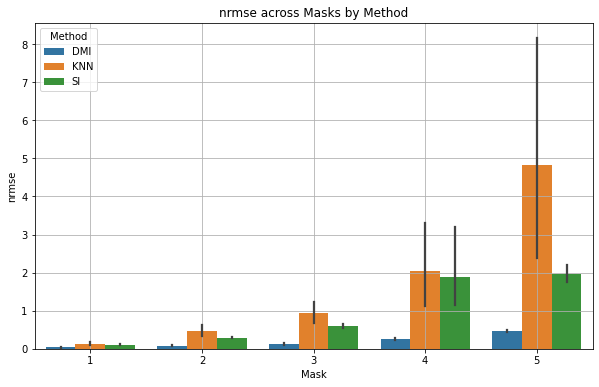

In [8]:
# bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='mask', y='nrmses', hue='method')

# Additional plot customization
plt.xlabel('Mask')
plt.ylabel('nrmse')
plt.title('nrmse across Masks by Method')
plt.grid(True)
plt.legend(title='Method')

plt.show()